# FORNAX 2D Neutrino Spectra

Neutrino spectra from the long-time run 2D (axisymmetric) models produced by Burrows and Vartanyan, 
[Nature **589**:29-39, 2021](https://www.nature.com/articles/s41586-020-03059-w).

Data taken from the HDF5 files available for download at [the Princeton group website](https://www.astro.princeton.edu/~burrows/nu-emissions.2d/data/).

In [1]:
from snewpy.neutrino import Flavor
from snewpy.models import Fornax_2021_2D

from astropy import units as u

from glob import glob

import h5py
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rc('font', size=16)

## Model Class

Test class that inherits from the `SupernovaModel` abstract base class in `snewpy.models`.

In this implementation, we read in the spectra computed on a discrete energy grid with 12 energy bins (see the [documentation here](https://www.astro.princeton.edu/~burrows/nu-emissions.2d/data/)) and linearly interpolate to obtain a reasonably smooth spectrum.

## Test Instantiation using a $12M_{\odot}$ Model

In [3]:
model = Fornax_2021_2D('../../models/Fornax_2021/lum_spec_12M_r10000_dat.h5')

In [4]:
model

**Fornax 2D Model**: ../../models/Fornax_2021/lum_spec_12M_r10000_dat.h5

|Parameter|Value|
|:---------|:-----:|
|Progenitor mass | $12$ $\mathrm{M_{\odot}}$|

In [5]:
model.get_time()

<Quantity [-0.2135, -0.2125, -0.2115, ...,  4.4865,  4.4875,  4.4885] s>

### Luminosity of All Flavors vs. Time

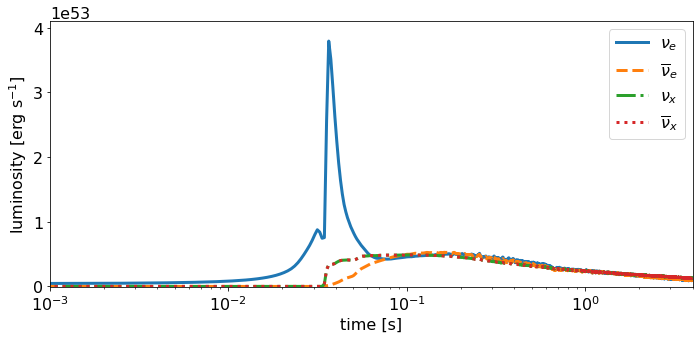

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,5), tight_layout=True)

linestyles = ['-', '--', '-.', ':']

for linestyle, flavor in zip(linestyles, Flavor):
    ax.plot(model.time, model.luminosity[flavor], lw=3, ls=linestyle, label=flavor.to_tex())

ax.set(xscale='log',
       xlim=(1e-3, 4),
       xlabel='time [s]',
       ylim=(-0.1e52, 4.1e53),
       ylabel='luminosity [erg s$^{-1}$]')
ax.legend();

### Spectra of All Flavors vs. Time

#### Use Default Linear Interpolation in Flux Retrieval

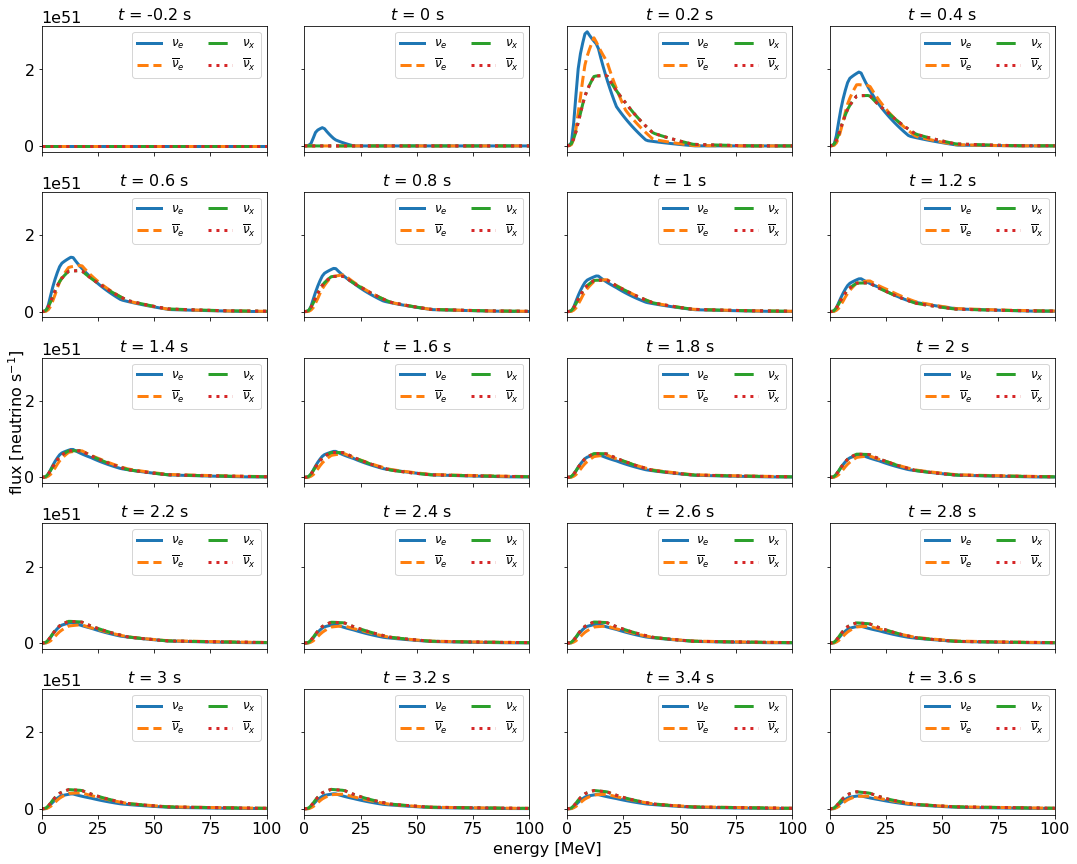

In [7]:
times = np.arange(-0.2, 3.8, 0.2) * u.s
E = np.arange(0, 101, 1) * u.MeV

fig, axes = plt.subplots(5,4, figsize=(15,12), sharex=True, sharey=True, tight_layout=True)

linestyles = ['-', '--', '-.', ':']

for t, ax in zip(times, axes.flatten()):
    spectra = model.get_initialspectra(t, E)
    for line, flavor in zip(linestyles, Flavor):
        ax.plot(E, spectra[flavor], lw=3, ls=line, label=flavor.to_tex())
    ax.set(xlim=(0,100))
    ax.set_title('$t$ = {:g}'.format(t), fontsize=16)
    ax.legend(loc='upper right', ncol=2, fontsize=12)

fig.text(0.5, 0., 'energy [MeV]', ha='center')
fig.text(0., 0.5, 'flux [neutrino s$^{-1}$]', va='center', rotation='vertical');

#### Use Nearest-Bin "Interpolation" in Flux Retrieval

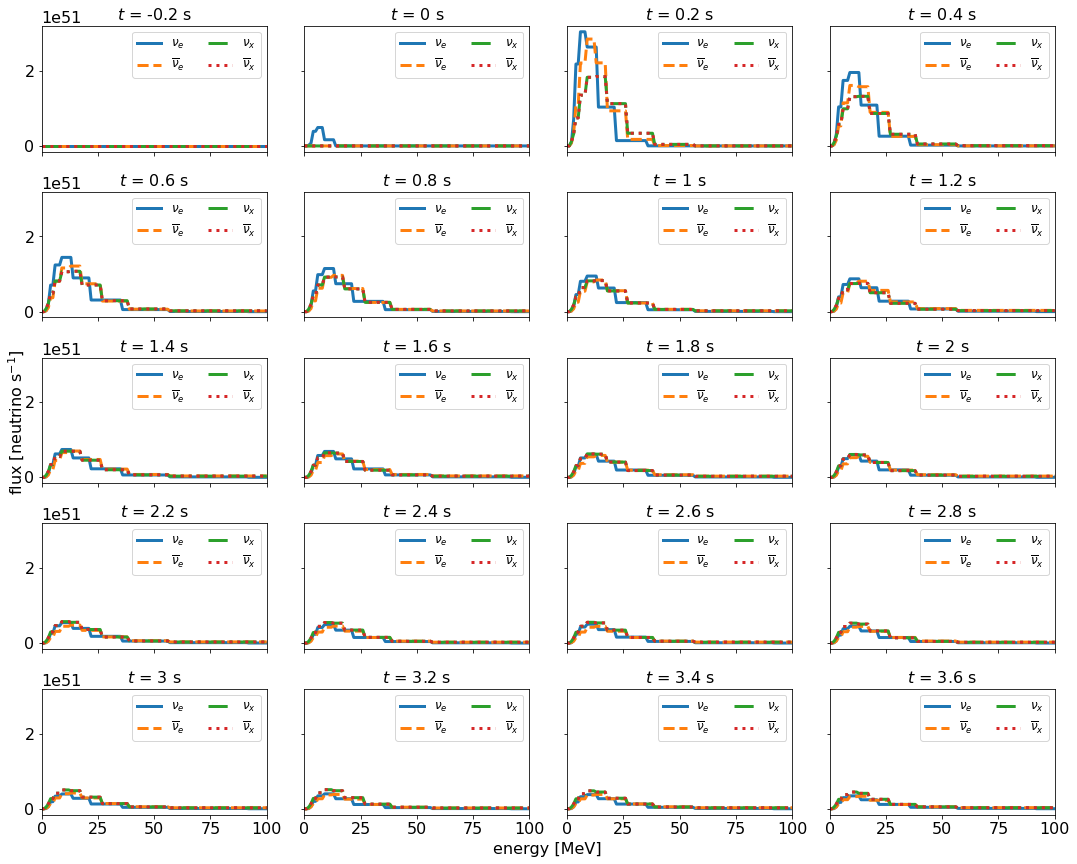

In [8]:
times = np.arange(-0.2, 3.8, 0.2) * u.s
E = np.arange(0, 101, 1) * u.MeV

fig, axes = plt.subplots(5,4, figsize=(15,12), sharex=True, sharey=True, tight_layout=True)

linestyles = ['-', '--', '-.', ':']

for t, ax in zip(times, axes.flatten()):
    spectra = model.get_initialspectra(t, E, interpolation='nearest')
    for line, flavor in zip(linestyles, Flavor):
        ax.plot(E, spectra[flavor], lw=3, ls=line, label=flavor.to_tex())
    ax.set(xlim=(0,100))
    ax.set_title('$t$ = {:g}'.format(t), fontsize=16)
    ax.legend(loc='upper right', ncol=2, fontsize=12)

fig.text(0.5, 0., 'energy [MeV]', ha='center')
fig.text(0., 0.5, 'flux [neutrino s$^{-1}$]', va='center', rotation='vertical');

## Progenitor Mass Dependence

### Luminosity vs. Time for a Selected List of Progenitor Masses

Plot $L_{\nu_{e}}(t)$ for a selection of progenitor masses to observe the dependence of the emission on mass.

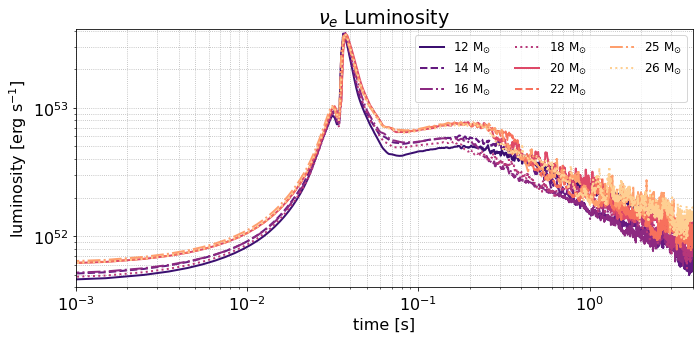

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10,5), tight_layout=True)

flavor = Flavor.NU_E
files = sorted(glob('../../models/Fornax_2021/lum*h5'))[::2]
colors = mpl.cm.magma(np.linspace(0.2,0.9, len(files)))
linestyles = ['-', '--', '-.', ':']

for i, file in enumerate(files):
    model = Fornax_2021_2D(file)
    ax.plot(model.time, model.luminosity[flavor], lw=2, color=colors[i], ls=linestyles[i%4],
            label='${0.value:g}$ {0.unit:latex}'.format(model.progenitor_mass))

ax.set(xscale='log',
       xlim=(1e-3, 4),
       xlabel='time [s]',
       yscale='log',
       ylim=(0.4e52, 4.1e53),
       ylabel='luminosity [erg s$^{-1}$]',
       title=r'$\nu_e$ Luminosity')

ax.grid(ls=':', which='both')
ax.legend(ncol=3, fontsize=12);

### Progenitor Dependence of Spectra at 70 ms

#### Use Default Linear Interpolation in Flux Retrieval

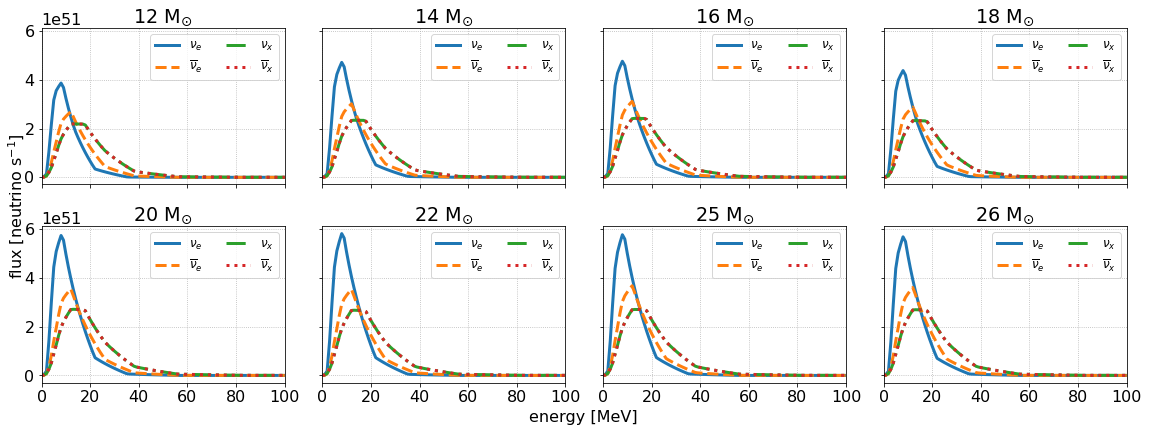

In [10]:
t = 70*u.ms
E = np.arange(0, 101, 1) * u.MeV

fig, axes = plt.subplots(2,4, figsize=(16,6), sharex=True, sharey=True, tight_layout=True)

linestyles = ['-', '--', '-.', ':']

for file, ax in zip(files, axes.flatten()):
    model = Fornax_2021_2D(file)
    spectra = model.get_initialspectra(t, E)
    for line, flavor in zip(linestyles, Flavor):
        ax.plot(E, spectra[flavor], lw=3, ls=line, label=flavor.to_tex())
    ax.set(xlim=(0,100))
    ax.set_title('${0.value:g}$ {0.unit:latex}'.format(model.progenitor_mass))
    ax.legend(loc='upper right', ncol=2, fontsize=12)
    ax.grid(ls=':')

fig.text(0.5, 0., 'energy [MeV]', ha='center')
fig.text(0., 0.5, 'flux [neutrino s$^{-1}$]', va='center', rotation='vertical');

#### Use Nearest-Bin "Interpolation" in Flux Retrieval

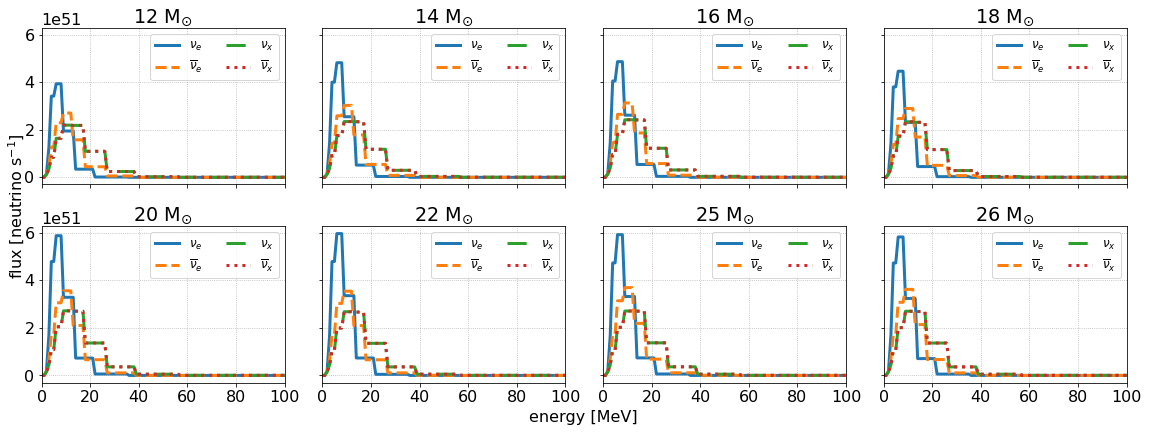

In [11]:
t = 70*u.ms
E = np.arange(0, 101, 1) * u.MeV

fig, axes = plt.subplots(2,4, figsize=(16,6), sharex=True, sharey=True, tight_layout=True)

linestyles = ['-', '--', '-.', ':']

for file, ax in zip(files, axes.flatten()):
    model = Fornax_2021_2D(file)
    spectra = model.get_initialspectra(t, E, interpolation='nearest')
    for line, flavor in zip(linestyles, Flavor):
        ax.plot(E, spectra[flavor], lw=3, ls=line, label=flavor.to_tex())
    ax.set(xlim=(0,100))
    ax.set_title('${0.value:g}$ {0.unit:latex}'.format(model.progenitor_mass))
    ax.legend(loc='upper right', ncol=2, fontsize=12)
    ax.grid(ls=':')

fig.text(0.5, 0., 'energy [MeV]', ha='center')
fig.text(0., 0.5, 'flux [neutrino s$^{-1}$]', va='center', rotation='vertical');